In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [45]:
df = pd.read_csv('user_vector.csv', index_col=0)

In [46]:
users = pd.read_csv('ratings.csv')

In [47]:
movies = pd.read_csv('movies.csv')

In [48]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [49]:
users_movies = pd.merge(users, movies,on='movieId')

In [76]:
df['x1'] = 1


,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,x1
userId,,,,,,,,,,,,,,,,,,,,
1,5,9,3,2,5,2,0,7,4,0,2,0,1,0,1,5,6,1,1,1
2,19,12,6,8,32,9,0,39,10,0,4,2,4,4,22,5,21,5,2,1
3,16,10,4,5,18,10,3,25,5,0,4,4,2,2,10,7,11,6,1,1
4,62,62,24,41,88,38,2,56,37,1,18,1,24,11,28,43,44,4,1,1
5,12,20,10,14,55,10,3,39,14,0,4,5,10,6,37,7,12,4,0,1


In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()

In [80]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [81]:
scaler_feature = scaler.transform(df)

In [82]:
df_normalize = pd.DataFrame(scaler_feature, columns=df.columns)

In [83]:
df_normalize.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,x1
0,-0.582893,-0.528924,-0.410011,-0.523699,-0.561672,-0.608555,-0.243611,-0.531620,-0.499590,-0.340012,-0.352483,-0.448777,-0.441613,-0.625676,-0.604656,-0.514132,-0.553668,-0.591921,-0.357865,0.0
1,-0.351861,-0.462287,-0.211466,-0.236371,-0.268175,-0.417026,-0.243611,-0.246638,-0.247320,-0.340012,-0.265656,-0.257947,-0.222169,-0.405438,-0.148175,-0.514132,-0.290980,-0.227034,-0.164370,0.0
2,-0.401368,-0.506712,-0.343830,-0.380035,-0.420359,-0.389665,0.069937,-0.371318,-0.457545,-0.340012,-0.265656,-0.067117,-0.368465,-0.515557,-0.409021,-0.456683,-0.466106,-0.135813,-0.357865,0.0
3,0.357739,0.648328,0.979806,1.343933,0.340557,0.376453,-0.034579,-0.095242,0.887895,-0.139882,0.342131,-0.353362,1.240789,-0.020022,-0.017753,0.577403,0.111809,-0.318256,-0.357865,0.0
4,-0.467377,-0.284589,0.053261,0.050957,-0.018160,-0.389665,0.069937,-0.246638,-0.079140,-0.340012,-0.265656,0.028297,0.216718,-0.295319,0.177882,-0.456683,-0.448593,-0.318256,-0.551361,0.0


In [86]:
from sklearn.cluster import KMeans
from sklearn.cross_validation import train_test_split

In [85]:
# X_train, X_test= train_test_split(df_normalize, test_size=0.2, random_state=101)

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,x1,interest
userId,,,,,,,,,,,,,,,,,,,,,
1,5,9,3,2,5,2,0,7,4,0,...,0,1,0,1,5,6,1,1,1,Adventure
2,19,12,6,8,32,9,0,39,10,0,...,2,4,4,22,5,21,5,2,1,Drama
3,16,10,4,5,18,10,3,25,5,0,...,4,2,2,10,7,11,6,1,1,Drama
4,62,62,24,41,88,38,2,56,37,1,...,1,24,11,28,43,44,4,1,1,Comedy
5,12,20,10,14,55,10,3,39,14,0,...,5,10,6,37,7,12,4,0,1,Comedy


In [223]:
model = KMeans(n_clusters=10)

In [224]:
labels = model.fit_predict(df.drop('interest', axis=1))

In [225]:
labels

array([0, 0, 0, 6, 6, 0, 6, 6, 0, 0, 0, 0, 0, 0, 3, 0, 4, 0, 4, 6, 6, 4, 9,
       0, 0, 6, 0, 0, 0, 9, 0, 0, 6, 6, 0, 6, 0, 6, 0, 0, 6, 0, 6, 0, 0, 0,
       0, 7, 6, 0, 0, 0, 0, 0, 0, 8, 6, 0, 0, 0, 6, 0, 6, 0, 0, 0, 6, 6, 0,
       0, 0, 6, 3, 0, 6, 0, 4, 4, 0, 0, 6, 0, 6, 6, 6, 6, 0, 2, 0, 0, 6, 6,
       6, 6, 2, 0, 6, 0, 6, 0, 0, 8, 6, 0, 8, 0, 0, 0, 0, 6, 2, 0, 0, 0, 0,
       0, 0, 6, 8, 6, 0, 0, 0, 6, 2, 0, 0, 2, 0, 4, 0, 6, 6, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 2, 4, 0, 4, 0, 0, 0, 0, 4, 0, 6, 6, 6,
       0, 0, 0, 8, 0, 0, 6, 6, 0, 0, 0, 0, 0, 6, 4, 4, 6, 0, 0, 0, 6, 0, 0,
       6, 0, 2, 6, 6, 0, 0, 0, 0, 0, 8, 6, 0, 0, 7, 4, 6, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 1, 1, 6, 0, 0, 6, 0, 6, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6,
       0, 8, 0, 6, 6, 2, 0, 6, 2, 2, 0, 8, 4, 0, 6, 0, 4, 6, 0, 6, 6, 0, 6,
       6, 6, 0, 6, 0, 0, 0, 0, 8, 6, 0, 6, 0, 0, 4, 0, 4, 0, 0, 6, 0, 2, 0,
       0, 0, 0, 0, 0, 6, 6, 0, 4, 0, 4, 0, 0, 0, 0, 2, 0, 1, 4, 0, 6, 0, 2,
       0, 0,

In [177]:
type(labels)

numpy.ndarray

In [198]:
df.iloc[:, 0:10]

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir
userId,,,,,,,,,,
1,5,9,3,2,5,2,0,7,4,0
2,19,12,6,8,32,9,0,39,10,0
3,16,10,4,5,18,10,3,25,5,0
4,62,62,24,41,88,38,2,56,37,1
5,12,20,10,14,55,10,3,39,14,0
6,15,15,4,5,16,7,0,20,8,0
7,35,32,12,14,37,11,0,29,13,0
8,31,22,3,6,32,30,1,58,11,2
9,8,6,3,2,14,9,0,28,5,0


In [209]:
labels

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 2, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 4, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 2,
       0, 0,

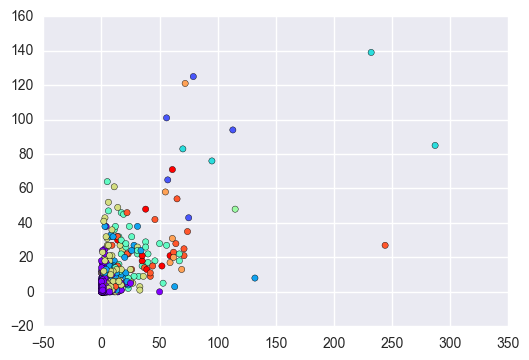

In [226]:
plt.scatter(np.asarray(df.iloc[:, 10]), np.asarray(df.iloc[:, 2]), c=labels, cmap='rainbow')

In [167]:
df['interest'] = df.idxmax(axis=1)

In [186]:
df.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,interest
userId,,,,,,,,,,,,,,,,,,,,
1,5,9,3,2,5,2,0,7,4,0,2,0,1,0,1,5,6,1,1,Adventure
2,19,12,6,8,32,9,0,39,10,0,4,2,4,4,22,5,21,5,2,Drama
3,16,10,4,5,18,10,3,25,5,0,4,4,2,2,10,7,11,6,1,Drama
4,62,62,24,41,88,38,2,56,37,1,18,1,24,11,28,43,44,4,1,Comedy
5,12,20,10,14,55,10,3,39,14,0,4,5,10,6,37,7,12,4,0,Comedy


In [8]:
cols = {'Action':0, 'Adventure':1, 'Animation':2, 'Children':3, 'Comedy':4,'Crime':5,
       'Documentary':6, 'Drama':7, 'Fantasy':8, 'Film-Noir':9, 'Horror':10, 'IMAX':11,
       'Musical':12, 'Mystery':13, 'Romance':14, 'Sci-Fi':15, 'Thriller':16, 'War':17, 'Western':18}

In [171]:
def mappingCategorical(str):
    return cols[str]

In [9]:
df['hobby'] = df['interest'].map(cols)

In [10]:
df.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,interest,hobby
userId,,,,,,,,,,,,,,,,,,,,,
1,5,9,3,2,5,2,0,7,4,0,...,0,1,0,1,5,6,1,1,Adventure,1
2,19,12,6,8,32,9,0,39,10,0,...,2,4,4,22,5,21,5,2,Drama,7
3,16,10,4,5,18,10,3,25,5,0,...,4,2,2,10,7,11,6,1,Drama,7
4,62,62,24,41,88,38,2,56,37,1,...,1,24,11,28,43,44,4,1,Comedy,4
5,12,20,10,14,55,10,3,39,14,0,...,5,10,6,37,7,12,4,0,Comedy,4


In [39]:
import time

In [51]:

def convertTimeStampToReadableDate(timestamp):
    return time.ctime(timestamp)



In [44]:
user_rating['Rating Date'] = user_rating['timestamp'].apply(lambda x: convertTimeStampToReadableDate(x))

In [46]:
user_rating.tail()

,movieId,rating,timestamp,Rating Date
userId,,,,
671,6268,2.5,1065579370,Wed Oct 8 09:16:10 2003
671,6269,4.0,1065149201,Fri Oct 3 09:46:41 2003
671,6365,4.0,1070940363,Tue Dec 9 10:26:03 2003
671,6385,2.5,1070979663,Tue Dec 9 21:21:03 2003
671,6565,3.5,1074784724,Thu Jan 22 22:18:44 2004


In [52]:
user_rating = pd.read_csv('ratings.csv', index_col='userId')

In [38]:
user_rating.head()
user_rating.describe()
user_rating.groupby('timestamp')['rating'].count()

timestamp
789652009      3
828212412      7
828212413      1
828213114      3
828213115     30
828213150     20
828213511      1
828214011     17
828214012     37
828786667      1
829351964     12
829352433     19
829471719     23
829471720     38
829471721     27
829471722     20
829471925      1
829491839      4
829491840      3
829492315     12
829492316     29
829495183      3
829911793      4
829912557     10
829912558     16
830633216      1
830633234      1
830633251      1
830633279      1
831090605      9
              ..
1476551043     1
1476551057     1
1476551062     1
1476551142     1
1476551191     1
1476551238     1
1476551305     1
1476551350     1
1476551370     1
1476552210     1
1476552471     1
1476552477     1
1476552557     1
1476555047     1
1476555871     1
1476562414     1
1476564766     1
1476587644     1
1476616373     1
1476622829     1
1476622832     1
1476622980     1
1476623034     1
1476623070     1
1476623117     1
1476623131     1
1476623217     1
1476

(array([  1101.,   3326.,   1687.,   7271.,   4449.,  20064.,  10538.,
         28750.,   7723.,  15095.]),
 array([ 0.5 ,  0.95,  1.4 ,  1.85,  2.3 ,  2.75,  3.2 ,  3.65,  4.1 ,
         4.55,  5.  ]),
 <a list of 10 Patch objects>)

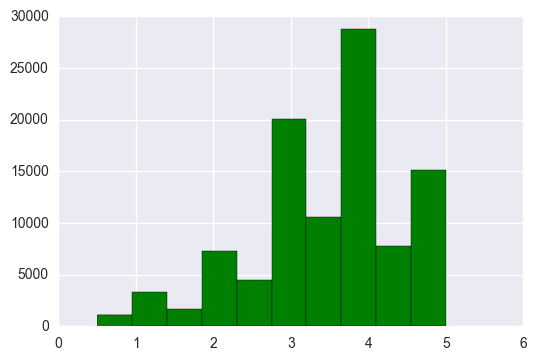

In [47]:
plt.hist(x=user_rating['rating'], color='g',bins=10)

/Users/trantphuong/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


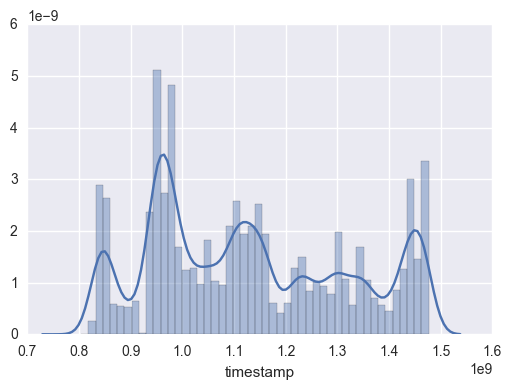

In [50]:
sns.distplot(user_rating['timestamp'])

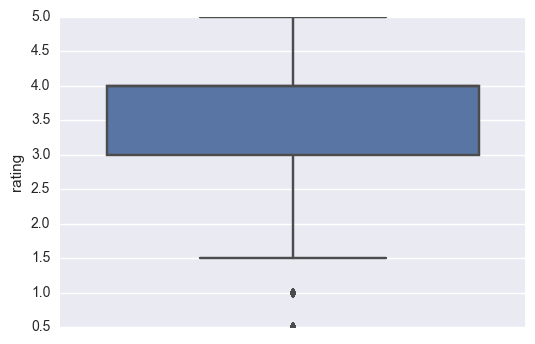

In [19]:
sns.boxplot(y='rating', hue='timestamp', data=user_rating)

In [54]:
user_rating['rating'].mode

<bound method Series.mode of userId
1      2.5
1      3.0
1      3.0
1      2.0
1      4.0
1      2.0
1      2.0
1      2.0
1      3.5
1      2.0
1      2.5
1      1.0
1      4.0
1      4.0
1      3.0
1      2.0
1      2.0
1      2.5
1      1.0
1      3.0
2      4.0
2      5.0
2      5.0
2      4.0
2      4.0
2      3.0
2      3.0
2      4.0
2      3.0
2      5.0
      ... 
671    4.5
671    5.0
671    3.5
671    4.0
671    5.0
671    5.0
671    4.5
671    4.5
671    5.0
671    4.0
671    2.0
671    2.0
671    3.0
671    4.0
671    4.0
671    4.5
671    3.0
671    4.0
671    4.0
671    3.5
671    5.0
671    4.0
671    4.5
671    4.0
671    2.5
671    2.5
671    4.0
671    4.0
671    2.5
671    3.5
Name: rating, dtype: float64>

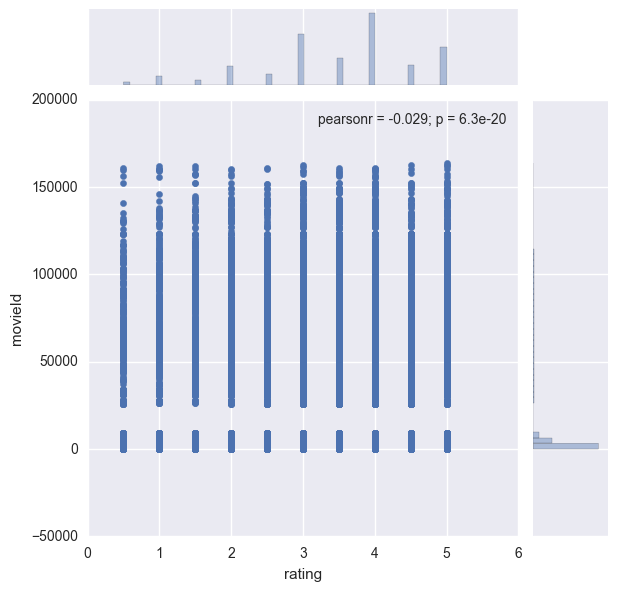

In [64]:
sns.jointplot(x='rating',y='movieId',data=user_rating,kind='scatter')

In [65]:
movies = pd.read_csv('movies.csv')

In [66]:
users_rate_movies = pd.merge(user_rating, movies,on='movieId',)

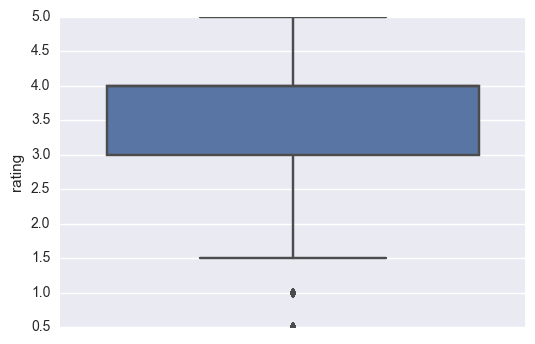

In [74]:
sns.boxplot(y='rating',data=users_rate_movies)

In [ ]:
sns.jointplot(x='rating', y='')

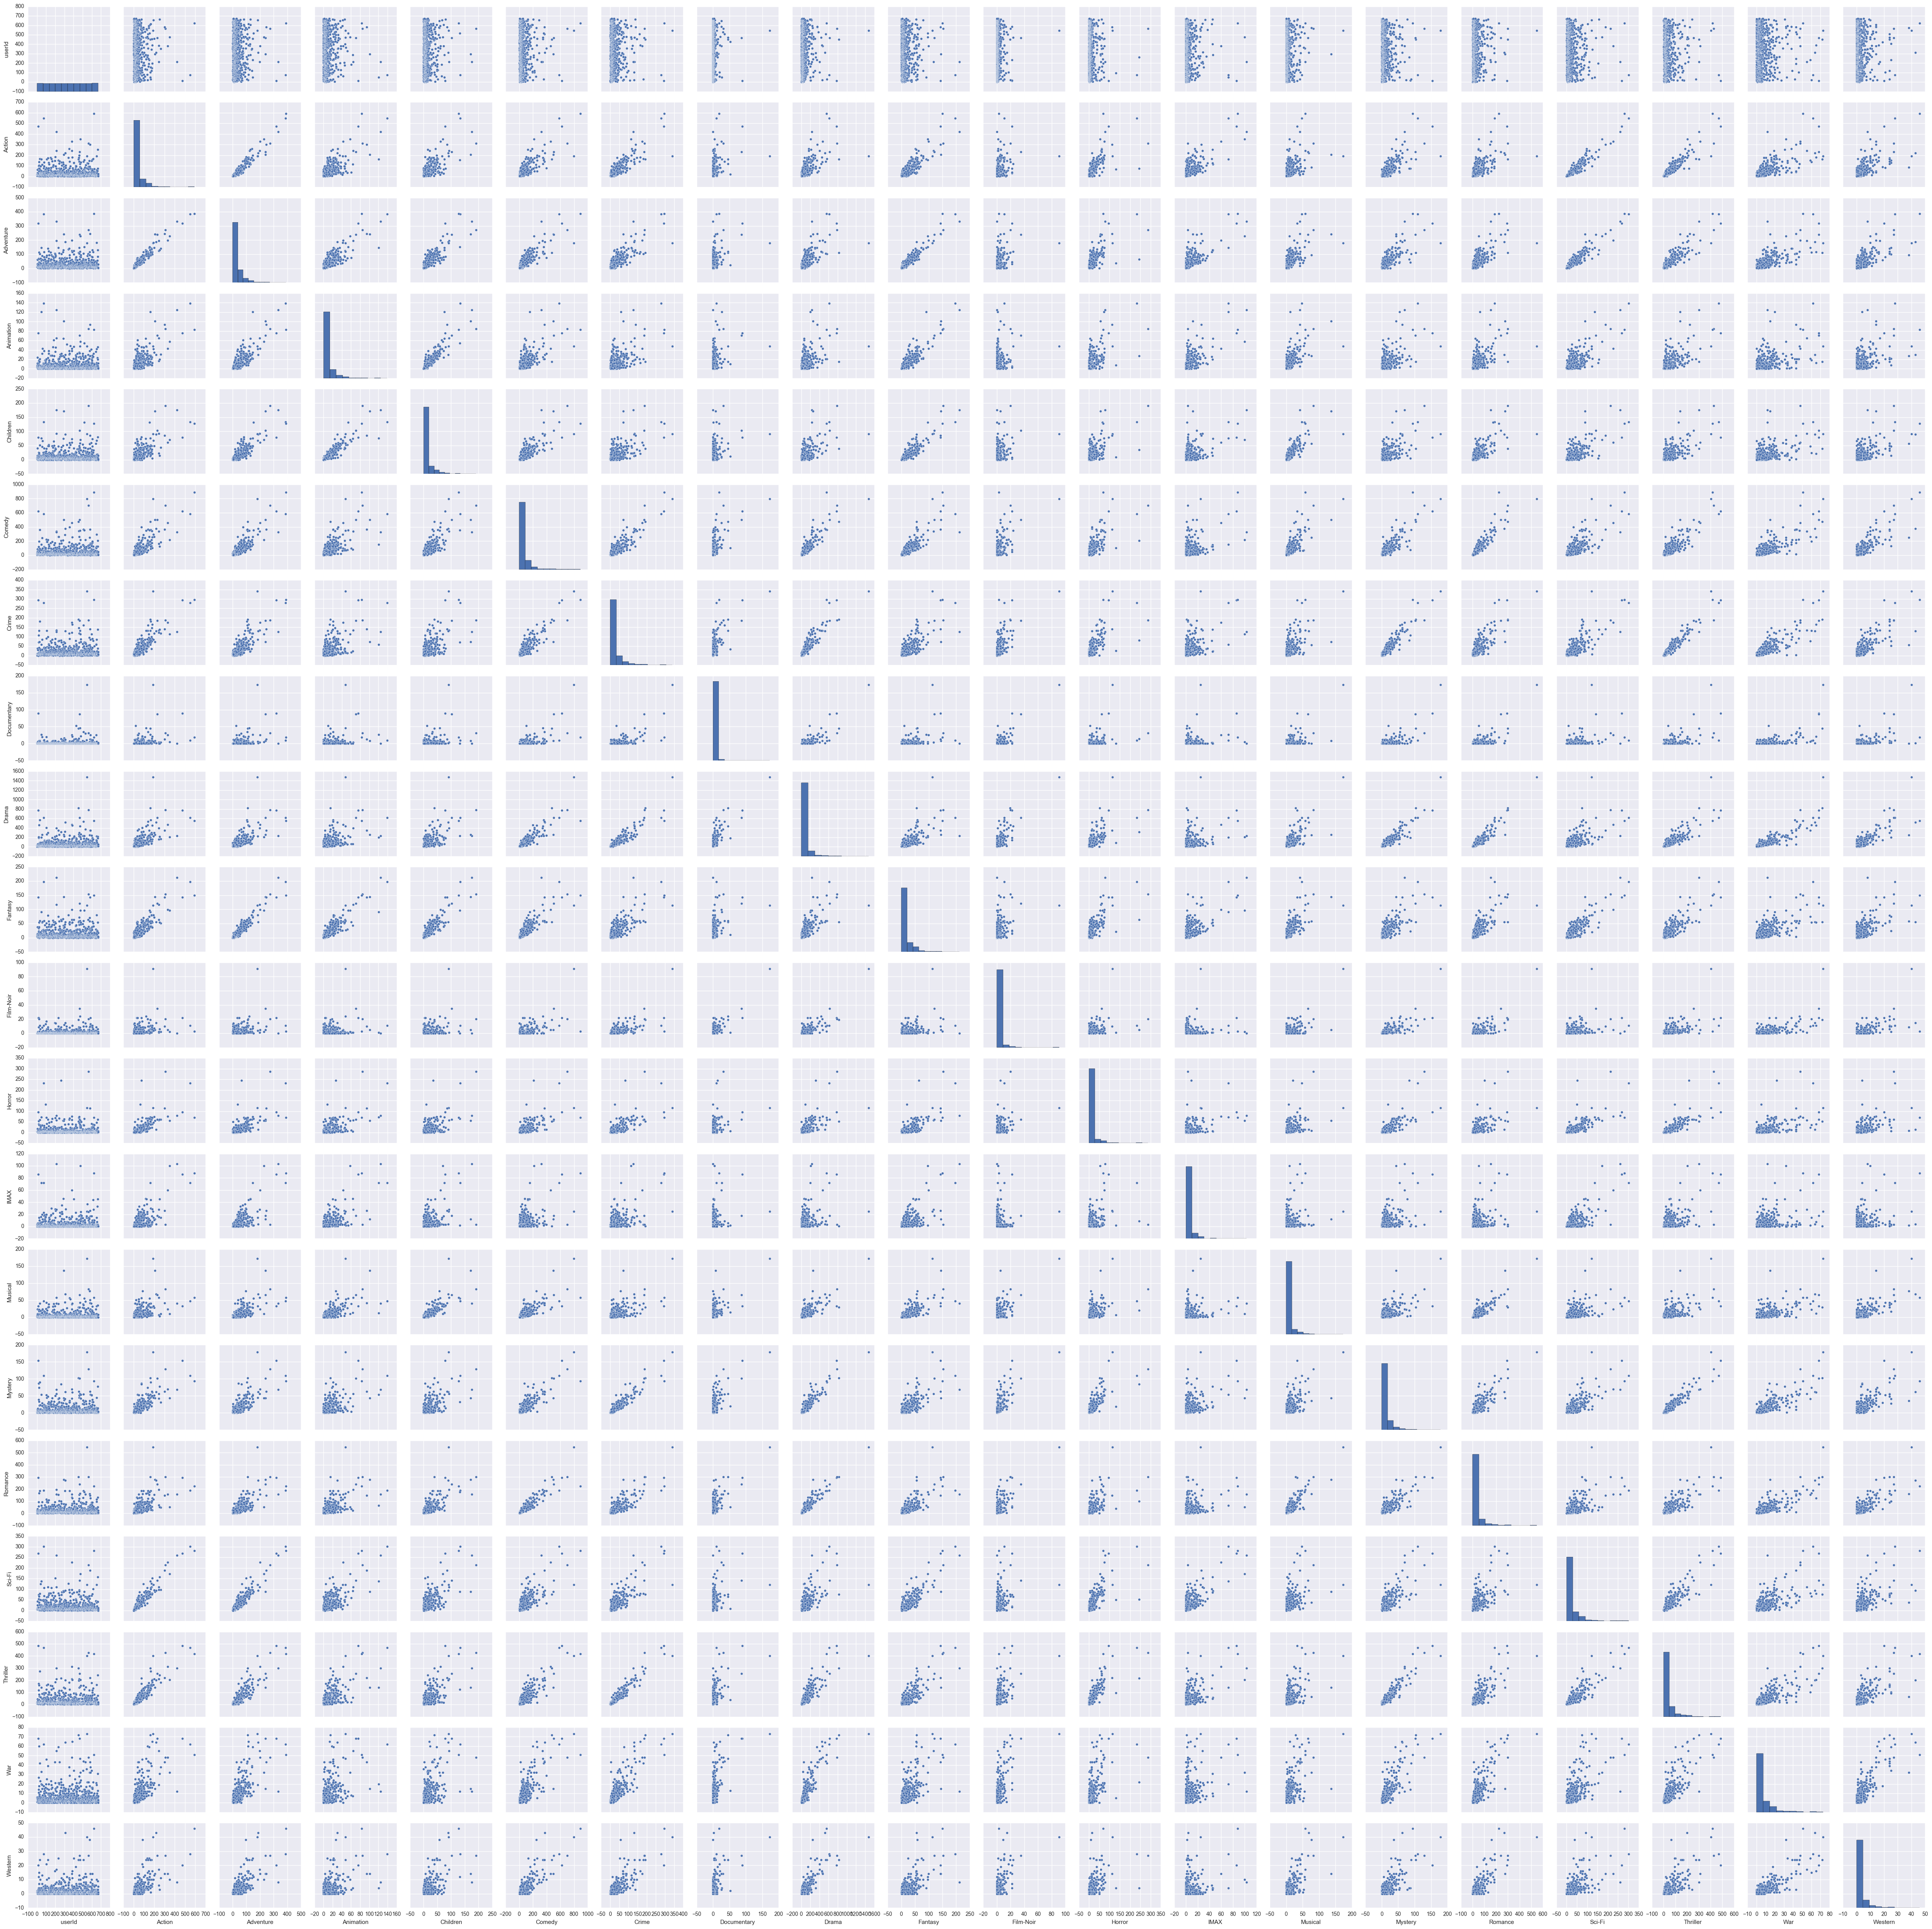

In [9]:
sns.pairplot(data=df)

In [261]:
df.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,interest,hobby
userId,,,,,,,,,,,,,,,,,,,,,
1,5,9,3,2,5,2,0,7,4,0,...,0,1,0,1,5,6,1,1,Adventure,1
2,19,12,6,8,32,9,0,39,10,0,...,2,4,4,22,5,21,5,2,Drama,7
3,16,10,4,5,18,10,3,25,5,0,...,4,2,2,10,7,11,6,1,Drama,7
4,62,62,24,41,88,38,2,56,37,1,...,1,24,11,28,43,44,4,1,Comedy,4
5,12,20,10,14,55,10,3,39,14,0,...,5,10,6,37,7,12,4,0,Comedy,4


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split

/Users/trantphuong/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['interest', 'hobby'], axis=1), df['hobby'], test_size=0.2, random_state=42)

In [54]:
model = KNeighborsClassifier(n_neighbors=8)

In [55]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [56]:
predictions = model.predict(X_test)

In [22]:
X_test

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,
362,30,22,8,6,44,28,4,57,14,1,10,4,5,9,28,10,30,9,0
159,49,37,8,9,42,34,0,80,14,3,5,2,3,18,24,21,49,15,6
481,83,80,22,19,120,73,22,267,54,5,22,19,18,42,91,65,92,24,7
642,3,3,0,0,9,8,2,18,2,4,1,0,3,7,10,3,8,1,2
276,13,6,3,4,11,7,0,2,4,0,3,1,0,1,3,4,5,1,1
363,49,58,49,53,71,16,1,74,27,1,14,2,53,11,35,66,32,5,3
311,220,187,30,89,376,131,2,522,56,15,14,4,68,62,271,93,200,64,43
200,95,80,36,40,107,60,1,94,30,1,11,15,10,22,54,41,84,15,1
524,20,19,2,3,16,17,0,33,11,0,4,7,0,8,6,8,23,2,2


In [16]:
predictions

array([ 7,  7,  7,  7,  0,  4,  7,  7,  7,  4,  0,  7,  0,  7,  7,  7,  0,
        7,  0,  7,  4, 16,  4,  7,  7,  7,  7,  7,  4,  0,  4,  7,  7,  4,
        0,  7,  7,  0,  0,  7,  4,  7,  0,  7,  7,  0,  4,  7,  7,  7,  7,
        0,  7,  7,  0,  7,  4,  0,  0,  7,  7,  7,  7,  0,  4,  7,  7,  4,
        4,  0,  7,  4,  4,  0,  7,  7,  0,  7,  4,  7,  0,  0, 16,  7, 16,
       16,  7,  4,  0,  7,  7,  0,  7,  7,  7,  4,  7,  0,  0,  7,  4,  7,
        7,  0,  7,  7, 16,  0,  7, 16,  7,  7,  7,  0,  4,  7,  4,  0,  4,
        4,  7,  0,  7,  0,  4,  7,  4,  7,  7, 16,  7,  4,  4,  7,  7])

In [290]:
df['test'] = df.max(axis=1)

In [294]:
df.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,interest,hobby,test
userId,,,,,,,,,,,,,,,,,,,,,
1,5,9,3,2,5,2,0,7,4,0,...,1,0,1,5,6,1,1,Adventure,1,9
2,19,12,6,8,32,9,0,39,10,0,...,4,4,22,5,21,5,2,Drama,7,39
3,16,10,4,5,18,10,3,25,5,0,...,2,2,10,7,11,6,1,Drama,7,25
4,62,62,24,41,88,38,2,56,37,1,...,24,11,28,43,44,4,1,Comedy,4,88
5,12,20,10,14,55,10,3,39,14,0,...,10,6,37,7,12,4,0,Comedy,4,55


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671 entries, 1 to 671
Data columns (total 22 columns):
Action         671 non-null int64
Adventure      671 non-null int64
Animation      671 non-null int64
Children       671 non-null int64
Comedy         671 non-null int64
Crime          671 non-null int64
Documentary    671 non-null int64
Drama          671 non-null int64
Fantasy        671 non-null int64
Film-Noir      671 non-null int64
Horror         671 non-null int64
IMAX           671 non-null int64
Musical        671 non-null int64
Mystery        671 non-null int64
Romance        671 non-null int64
Sci-Fi         671 non-null int64
Thriller       671 non-null int64
War            671 non-null int64
Western        671 non-null int64
interest       671 non-null object
hobby          671 non-null int64
test           671 non-null int64
dtypes: int64(21), object(1)
memory usage: 120.6+ KB


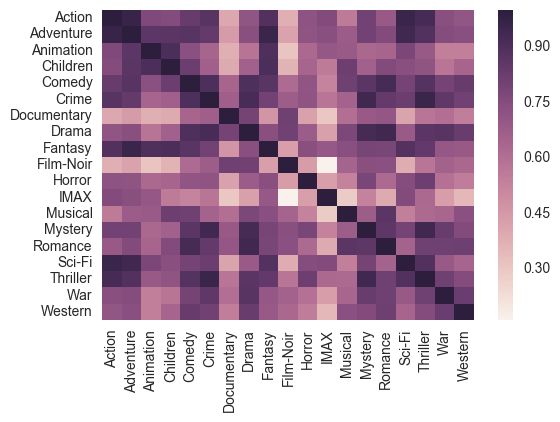

In [4]:
sns.heatmap(data=df.corr())

In [322]:
df.columns

Index(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'interest', 'hobby', 'test'],
      dtype='object')

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.63      0.74      0.68        23
          1       0.00      0.00      0.00         5
          4       0.63      0.61      0.62        31
          7       0.89      0.93      0.91        69
         10       0.00      0.00      0.00         2
         16       0.33      0.40      0.36         5

avg / total       0.72      0.76      0.74       135



/Users/trantphuong/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
user_vector.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,
1,5,19.5,6.0,5.0,10.0,5.0,0.0,18.0,8.5,0.0,6.0,0.0,3.0,0.0,3.5,12.0,17.0,2.0,3.0
2,19,45.0,22.0,28.0,99.0,33.0,0.0,141.0,34.0,0.0,14.0,8.0,15.0,16.0,79.0,19.0,70.0,19.0,10.0
3,16,33.0,11.5,13.5,65.0,37.0,11.0,98.0,15.0,0.0,13.5,11.5,5.0,7.5,36.5,22.0,39.0,25.0,4.0
4,62,269.0,113.0,190.0,381.0,158.0,8.0,250.0,169.0,5.0,71.0,5.0,116.0,45.0,126.0,183.0,177.0,19.0,3.0
5,12,76.5,39.0,54.5,219.0,34.5,11.0,148.5,52.5,0.0,15.5,20.0,42.5,20.0,151.0,28.0,43.5,16.0,0.0


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(user_vector)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaled_feature = scaler.transform(user_vector)

In [10]:
user_vector_scaled = pd.DataFrame(scaled_feature, columns=user_vector.columns)

In [18]:
user_vector_scaled.describe()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02,6.710000e+02
mean,-2.357776e-17,-1.867090e-17,-5.054741e-17,2.986516e-17,-5.513887e-17,-4.777599e-17,-4.136449e-18,2.109589e-18,-4.426001e-17,2.837604e-16,-3.077518e-17,7.586248e-17,-1.281058e-16,-4.574913e-17,3.139565e-17,4.186087e-17,5.981306e-17,5.041298e-17,1.036594e-16
std,1.000746e+00,1.000746e+00,1.000746e+00,1.000746e+00,1.000746e+00,1.000746e+00,1.000746e+00,1.000746e+00,1.000746e+00,1.000746e+00,1.000746e+00,1.000746e+00,1.000746e+00,1.000746e+00,1.000746e+00,1.000746e+00,1.000746e+00,1.000746e+00,1.000746e+00
min,-6.489023e-01,-7.819845e-01,-6.297903e-01,-6.444856e-01,-6.603938e-01,-7.084527e-01,-2.490914e-01,-6.170296e-01,-7.147311e-01,-3.454720e-01,-4.477655e-01,-4.941240e-01,-5.204456e-01,-6.573428e-01,-6.650562e-01,-7.015819e-01,-7.069972e-01,-7.035701e-01,-5.617716e-01
25%,-5.168838e-01,-5.856623e-01,-5.450257e-01,-5.294972e-01,-5.166749e-01,-5.257793e-01,-2.490914e-01,-4.742779e-01,-5.804188e-01,-3.454720e-01,-3.943769e-01,-4.941240e-01,-4.587951e-01,-5.315746e-01,-5.222803e-01,-5.510643e-01,-5.200319e-01,-5.558980e-01,-5.617716e-01
50%,-3.353584e-01,-3.554915e-01,-3.660782e-01,-3.570146e-01,-3.509755e-01,-3.431059e-01,-2.490914e-01,-3.187807e-01,-3.693565e-01,-3.454720e-01,-3.076206e-01,-3.029061e-01,-3.252192e-01,-3.586433e-01,-3.567900e-01,-3.607038e-01,-3.330666e-01,-3.466958e-01,-3.406549e-01
75%,7.719933e-02,1.945490e-01,1.189638e-01,1.244994e-01,5.904608e-02,9.967851e-02,-1.089670e-01,5.211862e-02,1.455074e-01,-8.844603e-02,-6.069862e-02,-5.285183e-02,1.385834e-02,9.726654e-02,9.100734e-02,1.151973e-01,8.760542e-02,1.209327e-01,1.015786e-01
max,9.087461e+00,7.812187e+00,8.628390e+00,8.259930e+00,8.199454e+00,8.683343e+00,1.778491e+01,1.235425e+01,7.849279e+00,1.713229e+01,1.348664e+01,8.537247e+00,1.138837e+01,9.254766e+00,1.081218e+01,8.108124e+00,7.786571e+00,6.298551e+00,8.504014e+00


In [12]:
from sklearn.cluster import KMeans

In [13]:
model = KMeans(n_clusters=11)

In [14]:
model.fit_predict(user_vector)

array([ 3,  3,  3,  5,  0,  3,  3,  0,  3,  3,  3,  3,  3,  3,  1,  3,  2,
        3,  2,  0,  0,  0,  8,  3,  3,  0,  3,  3,  3,  1,  3,  3,  0,  0,
        3,  0,  3,  0,  3,  3,  0,  3,  0,  3,  3,  3,  3, 10,  0,  3,  3,
        3,  3,  3,  3,  2,  5,  3,  3,  3,  0,  3,  0,  3,  3,  3,  0,  0,
        0,  0,  3,  0,  6,  3,  0,  3, 10, 10,  3,  3,  0,  3,  0,  0,  3,
        0,  3,  5,  3,  3,  0,  0,  0,  0, 10,  3,  0,  0,  0,  3,  3,  8,
        3,  3,  2,  3,  3,  3,  3,  0,  5,  3,  3,  3,  3,  3,  3,  0,  2,
        0,  0,  3,  3,  0,  5,  3,  3,  5,  3, 10,  3,  0,  0, 10,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  0,  5, 10,  3,  0,  3,
        3,  3,  3, 10,  3,  0,  0,  3,  3,  3,  3, 10,  3,  3,  0,  0,  3,
        3,  3,  3,  3,  0,  0, 10,  0,  3,  3,  3,  0,  3,  3,  0,  3,  5,
        0,  0,  3,  3,  3,  3,  3,  5,  0,  3,  3, 10,  5,  0,  3,  3,  3,
        0,  3,  3,  3,  3,  3,  3,  8,  7,  0,  3,  0,  0,  3,  0,  5,  3,
        0,  3,  0,  3,  3

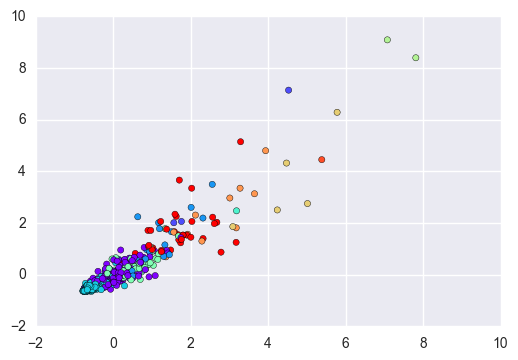

In [16]:
plt.scatter(user_vector_scaled['Adventure'], user_vector_scaled['Action'], c=model.labels_, cmap='rainbow')

In [36]:
 predictions = model.predict([[17, 17, 17, 17, 17, 10, 11, 12, 13, 12, 12, 1, 17, 4, 6, 12, 10, 20, 100]])

In [37]:
predictions

array([3], dtype=int32)